In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [11]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
dfle = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis= 'columns')

In [19]:
scale = MinMaxScaler()
dfle['petal length (cm)'] = scale.fit_transform(dfle[['petal length (cm)']])
dfle['petal width (cm)'] = scale.fit_transform(dfle[['petal width (cm)']])
dfle

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [23]:
sse = []
km = KMeans()
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dfle)
    sse.append(km.inertia_)
    
sse

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1588792731667126,
 0.8535683225340073,
 0.6795297632254396,
 0.566351649289804,
 0.48580845539143697,
 0.41677756310618175]

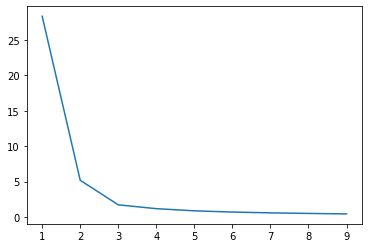

In [24]:
plt.plot(k_rng,sse)

In [27]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(dfle)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
dfle['cluster'] = y_predicted
dfle

km.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

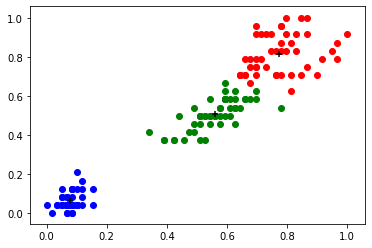

In [32]:
df0 = dfle[dfle.cluster==0]
df1 = dfle[dfle.cluster==1]
df2 = dfle[dfle.cluster==2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color = 'green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color = 'blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color = 'red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color= 'black', marker = '+')